In [25]:
import import_ipynb
from preprocessor_kor import Preprocessor_kor
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from string import punctuation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, BatchNormalization, LSTM, GRU, Bidirectional, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table('ratings_test.txt')
data = data.drop(labels = 'id', axis = 1)
data

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [3]:
data.nunique()

document    49157
label           2
dtype: int64

In [4]:
st = set(['은', '는', '이', '가', '를', '들', '에게', '의', '을', '도', '으로', '만', '라서', '하다', '에서', '로', '우리', '나', '저희'])
p = list(punctuation)
st.update(p)

In [5]:
ps = Preprocessor_kor(data, st)

In [6]:
ps.remove_null()
ps.remove_duplication('document')
ps.preprocessor('document')
t_x, tt_x, v_x, t_y, tt_y, v_y, total_word_num = ps.data_classificator('label', isstr = False, isbin = True)

<string>:33: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:34: FutureWarning: The default value of regex will change from True to False in a future version.
C:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [7]:
t_x.shape, v_x.shape, tt_x.shape, t_y.shape, v_y.shape, tt_y.shape

((27115, 57), (6759, 57), (14515, 57), (27115,), (6759,), (14515,))

In [8]:
batch_size = 256
max_sentence_num = 57
embedding_len = 128
neuron_num = 128
d_out = 0.5
lr = 0.001
ec = 50

In [9]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, restore_best_weights = True)
ck1 = ModelCheckpoint('best_km1.h5', monitor = 'val_acc', mode = 'max', save_best_only = True)
ck2 = ModelCheckpoint('best_km2.h5', monitor = 'val_acc', mode = 'max', save_best_only = True)
ck3 = ModelCheckpoint('best_km3.h5', monitor = 'val_acc', mode = 'max', save_best_only = True)
ck4 = ModelCheckpoint('best_km4.h5', monitor = 'val_acc', mode = 'max', save_best_only = True)

In [10]:
m1 = Sequential()
m1.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_num))
m1.add(SimpleRNN(neuron_num, dropout = d_out, return_sequences = True))
m1.add(SimpleRNN(neuron_num, dropout = d_out))
m1.add(Dense(neuron_num, activation = 'relu'))
m1.add(Dropout(d_out))
m1.add(BatchNormalization())
m1.add(Dense(neuron_num // 2, activation = 'relu'))
m1.add(Dropout(d_out))
m1.add(BatchNormalization())
m1.add(Dense(1, activation = 'sigmoid'))
m1.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])

In [15]:
hy1 = m1.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [ck1, es])

Epoch 1/50
106/106 [==============================] - 32s 301ms/step - loss: 0.8091 - acc: 0.5014 - val_loss: 0.6991 - val_acc: 0.5032
Epoch 2/50
106/106 [==============================] - 25s 238ms/step - loss: 0.7437 - acc: 0.4972 - val_loss: 0.6932 - val_acc: 0.4958
Epoch 3/50
106/106 [==============================] - 23s 212ms/step - loss: 0.7151 - acc: 0.5018 - val_loss: 0.6949 - val_acc: 0.5032
Epoch 4/50
106/106 [==============================] - 21s 200ms/step - loss: 0.7033 - acc: 0.5029 - val_loss: 0.6936 - val_acc: 0.4968
Epoch 5/50
106/106 [==============================] - 21s 202ms/step - loss: 0.6985 - acc: 0.4965 - val_loss: 0.6931 - val_acc: 0.5150
Epoch 6/50
106/106 [==============================] - 23s 216ms/step - loss: 0.6955 - acc: 0.5016 - val_loss: 0.6931 - val_acc: 0.5195
Epoch 7/50
106/106 [==============================] - 23s 218ms/step - loss: 0.6941 - acc: 0.5050 - val_loss: 0.6931 - val_acc: 0.5032
Epoch 8/50
106/106 [==============================] - 2

In [16]:
m2 = Sequential()
m2.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_num))
m2.add(LSTM(neuron_num, dropout = d_out, return_sequences = True))
m2.add(LSTM(neuron_num, dropout = d_out))
m2.add(Dense(neuron_num, activation = 'relu'))
m2.add(Dropout(d_out))
m2.add(BatchNormalization())
m2.add(Dense(neuron_num // 2, activation = 'relu'))
m2.add(Dropout(d_out))
m2.add(BatchNormalization())
m2.add(Dense(1, activation = 'sigmoid'))
m2.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])

In [18]:
hy2 = m2.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [ck2, es])

Epoch 1/50
106/106 [==============================] - 85s 743ms/step - loss: 0.7783 - acc: 0.5407 - val_loss: 0.6773 - val_acc: 0.5368
Epoch 2/50
106/106 [==============================] - 75s 705ms/step - loss: 0.4674 - acc: 0.7830 - val_loss: 0.5802 - val_acc: 0.7244
Epoch 3/50
106/106 [==============================] - 80s 753ms/step - loss: 0.3674 - acc: 0.8409 - val_loss: 0.4825 - val_acc: 0.8100
Epoch 4/50
106/106 [==============================] - 77s 730ms/step - loss: 0.3319 - acc: 0.8621 - val_loss: 0.4374 - val_acc: 0.8020
Epoch 5/50
106/106 [==============================] - 72s 679ms/step - loss: 0.3038 - acc: 0.8756 - val_loss: 0.4162 - val_acc: 0.8161
Epoch 6/50
106/106 [==============================] - 69s 654ms/step - loss: 0.2768 - acc: 0.8885 - val_loss: 0.4340 - val_acc: 0.8120
Epoch 7/50
106/106 [==============================] - 72s 680ms/step - loss: 0.2552 - acc: 0.8969 - val_loss: 0.4904 - val_acc: 0.8100
Epoch 8/50
106/106 [==============================] - 7

In [19]:
m3 = Sequential()
m3.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_num))
m3.add(GRU(neuron_num, dropout = d_out, return_sequences = True))
m3.add(GRU(neuron_num, dropout = d_out))
m3.add(Dense(neuron_num, activation = 'relu'))
m3.add(Dropout(d_out))
m3.add(BatchNormalization())
m3.add(Dense(neuron_num // 2, activation = 'relu'))
m3.add(Dropout(d_out))
m3.add(BatchNormalization())
m3.add(Dense(1, activation = 'sigmoid'))
m3.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])

In [20]:
hy3 = m3.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [ck3, es])

Epoch 1/50
106/106 [==============================] - 62s 554ms/step - loss: 0.7114 - acc: 0.6051 - val_loss: 0.6317 - val_acc: 0.7862
Epoch 2/50
106/106 [==============================] - 68s 639ms/step - loss: 0.4420 - acc: 0.8006 - val_loss: 0.5194 - val_acc: 0.7843
Epoch 3/50
106/106 [==============================] - 67s 635ms/step - loss: 0.3645 - acc: 0.8458 - val_loss: 0.4486 - val_acc: 0.7952
Epoch 4/50
106/106 [==============================] - 70s 664ms/step - loss: 0.3264 - acc: 0.8638 - val_loss: 0.4003 - val_acc: 0.8219
Epoch 5/50
106/106 [==============================] - 78s 738ms/step - loss: 0.3041 - acc: 0.8733 - val_loss: 0.4311 - val_acc: 0.8164
Epoch 6/50
106/106 [==============================] - 67s 632ms/step - loss: 0.2806 - acc: 0.8831 - val_loss: 0.4628 - val_acc: 0.8117
Epoch 7/50
106/106 [==============================] - 67s 631ms/step - loss: 0.2626 - acc: 0.8944 - val_loss: 0.4890 - val_acc: 0.8087


In [21]:
m4 = Sequential()
m4.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_num))
m4.add(Bidirectional(LSTM(neuron_num, dropout = d_out, return_sequences = True)))
m4.add(Bidirectional(LSTM(neuron_num // 2, dropout = d_out)))
m4.add(Dense(neuron_num, activation = 'relu'))
m4.add(Dropout(d_out))
m4.add(BatchNormalization())
m4.add(Dense(neuron_num // 2, activation = 'relu'))
m4.add(Dropout(d_out))
m4.add(BatchNormalization())
m4.add(Dense(1, activation = 'sigmoid'))
m4.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])

In [22]:
hy4 = m4.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [ck4, es])

Epoch 1/50
106/106 [==============================] - 178s 2s/step - loss: 0.7774 - acc: 0.5345 - val_loss: 0.5928 - val_acc: 0.6914
Epoch 2/50
106/106 [==============================] - 176s 2s/step - loss: 0.4432 - acc: 0.7956 - val_loss: 0.4768 - val_acc: 0.8083
Epoch 3/50
106/106 [==============================] - 134s 1s/step - loss: 0.3484 - acc: 0.8487 - val_loss: 0.4075 - val_acc: 0.8202
Epoch 4/50
106/106 [==============================] - 145s 1s/step - loss: 0.3135 - acc: 0.8697 - val_loss: 0.4092 - val_acc: 0.8148
Epoch 5/50
106/106 [==============================] - 161s 2s/step - loss: 0.2876 - acc: 0.8817 - val_loss: 0.4676 - val_acc: 0.7975
Epoch 6/50
106/106 [==============================] - 157s 1s/step - loss: 0.2610 - acc: 0.8954 - val_loss: 0.4999 - val_acc: 0.7938


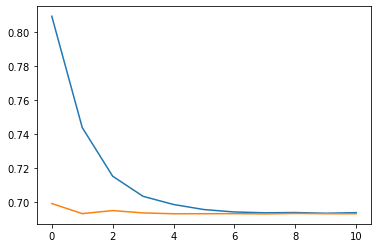

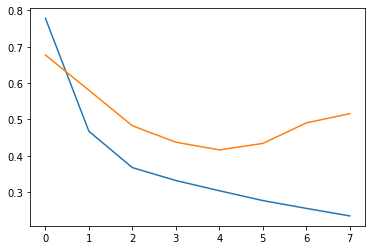

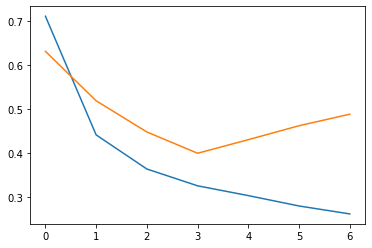

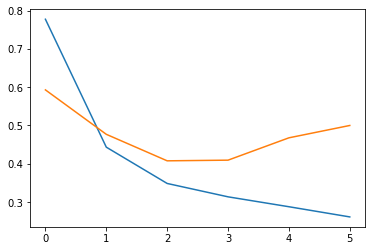

In [26]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])
plt.show()

plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])
plt.show()

plt.plot(hy3.history['loss'])
plt.plot(hy3.history['val_loss'])
plt.show()

plt.plot(hy4.history['loss'])
plt.plot(hy4.history['val_loss'])
plt.show()

In [27]:
m1.evaluate(tt_x, tt_y), m2.evaluate(tt_x, tt_y), m3.evaluate(tt_x, tt_y), m4.evaluate(tt_x, tt_y)

454/454 [==============================] - 30s 65ms/step - loss: 0.4091 - acc: 0.8126


([0.6930306553840637, 0.5140888690948486],
 [0.4225326478481293, 0.8079228401184082],
 [0.4085666239261627, 0.8175680041313171],
 [0.4090856611728668, 0.8126076459884644])